In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

In [6]:
iris_data = load_iris()

In [7]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
features = iris_data.data

In [10]:
X_data = pd.DataFrame(features, columns = iris_data.feature_names)

In [12]:
X_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# X_data[:,2]

In [13]:
from sklearn.cluster import KMeans

In [14]:
model_kmeans = KMeans(n_clusters = 3)

In [15]:
model_kmeans.fit(X_data)

KMeans(n_clusters=3)

In [16]:
labels = model_kmeans.predict(X_data)

In [17]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [18]:
centroid = model_kmeans.cluster_centers_

In [19]:
centroid

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

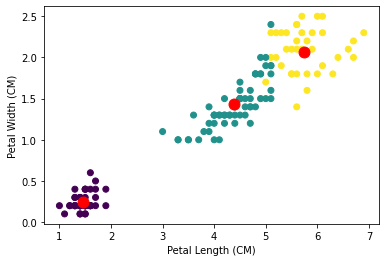

In [27]:
plt.scatter(X_data.iloc[:,2], X_data.iloc[:,3], c = labels)
plt.scatter(centroid[:,2], centroid[:,3], marker = 'o', c = 'red', s = 120)
plt.xlabel('Petal Length (CM)')
plt.ylabel('Petal Width (CM)')
plt.show()

In [ ]:
model_kmeans.inertia_

In [42]:
def find_interia():
    k_inertia = []
    for i in range(1,10):
        model_kmeans = KMeans(n_clusters  = i, random_state = 70311)
        model_kmeans.fit(X_data)
        k_inertia.append(model_kmeans.inertia_)
    return k_inertia

best_k = find_interia()
print(best_k)

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.44618205128204, 39.05497786747789, 34.427777417027414, 30.186555194805198, 27.788744645705187]


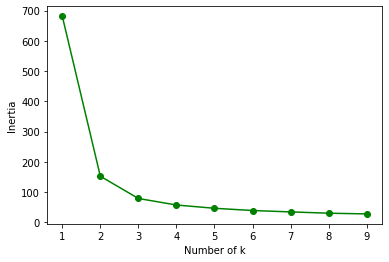

In [46]:
plt.plot(range(1,10), best_k, color = 'green', marker = 'o')
plt.xlabel('Number of k')
plt.ylabel('Inertia')
plt.show()